In [1]:
#customer segmentation using k-means clustering 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#lets load the data

In [4]:
df = pd.read_csv("C:\\Users\\Sricharan Reddy\\Downloads\\Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#there is no wrong data,null values and duplicates in this data set

In [11]:
#now lets do modelling 

In [39]:
x = df.iloc[:,3:5].values

# k-means clustering

In [41]:
from sklearn.cluster import KMeans

In [49]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\anacondarey\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [50]:
print(wcss)

[269981.28, 181363.595959596, 106348.3730621112, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30273.39431207004, 25030.383098520328, 21838.863692828912, 19770.06950274373]


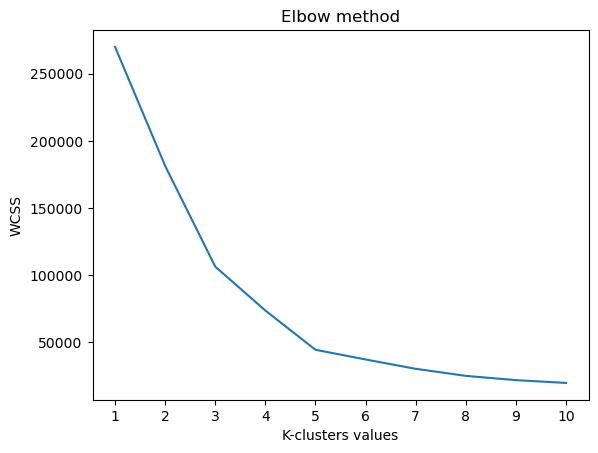

In [51]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title("Elbow method")
plt.xlabel("K-clusters values")
plt.ylabel("WCSS")
plt.show()

In [52]:
kmeans = KMeans(n_clusters=5,init='k-means++')

In [53]:
y_kmeans = kmeans.fit_predict(x)

In [54]:
y_kmeans

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

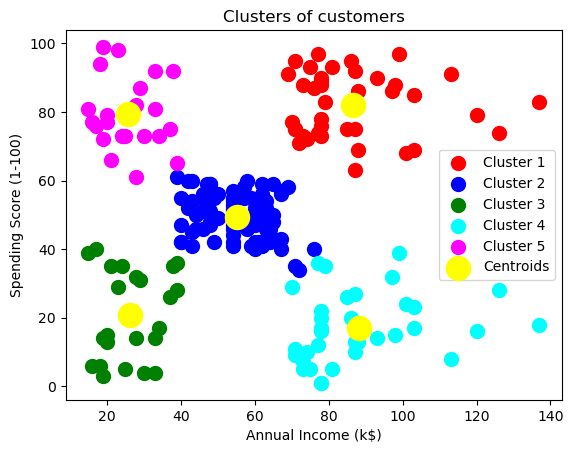

In [55]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],

s = 100, c = 'red', label = 'Cluster 1')

plt.scatter (x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter (x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label='Cluster 3')

plt.scatter (x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter (x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter (kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.xlabel('Annual Income (k$)')

plt.ylabel('Spending Score (1-100)')

plt.legend()

plt.show()